In [176]:
%pylab inline
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


In [5]:
hul=loadtxt('./hules.dat')
mel=loadtxt('./melegedes.dat')

In [10]:
k_hul=hul
k_mel=mel

k_hul[:,1]=hul[:,1]*0.3
k_mel[:,1]=mel[:,1]*0.3

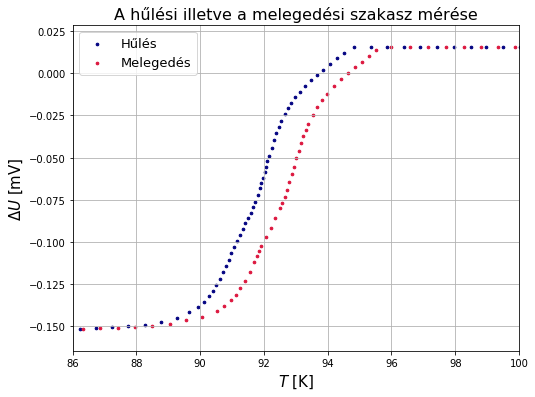

In [26]:
figsize(8,6)
scatter(hul[:,0],k_hul[:,1],color='navy',s=7,label='Hűlés')
scatter(mel[:,0],k_mel[:,1],color='crimson',s=7,label='Melegedés')
xlim(86,100)
grid(True)
plt.legend(fontsize=13)
xlabel('$T$ [K]',fontsize=15)
ylabel('$\Delta U$ [mV]',fontsize=15)
title('A hűlési illetve a melegedési szakasz mérése',fontsize=16)
savefig('./hul_mel.png',bbox_inches='tight')

In [70]:
hul_int=interpolate.interp1d(k_hul[109:174,1],k_hul[109:174,0])
mel_int=interpolate.interp1d(k_mel[:,1],k_mel[:,0])

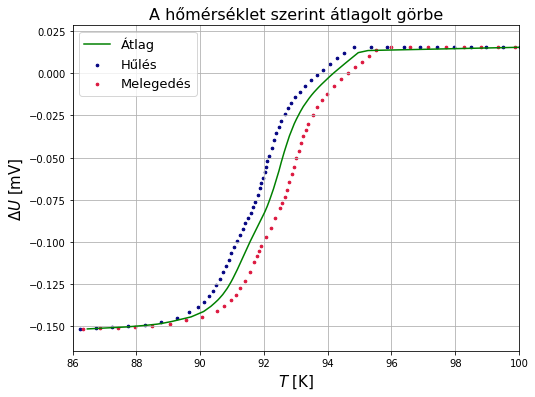

In [75]:
figsize(8,6)
mintapontok=linspace(-0.1515,0.0154,3000)

atlag=(hul_int(mintapontok)+mel_int(mintapontok))/2

scatter(hul[:,0],k_hul[:,1],color='navy',s=7,label='Hűlés')
scatter(mel[:,0],k_mel[:,1],color='crimson',s=7,label='Melegedés')
plot(atlag,mintapontok,'g-',label='Átlag')
xlim(86,100)
grid(True)
plt.legend(fontsize=13)
xlabel('$T$ [K]',fontsize=15)
ylabel('$\Delta U$ [mV]',fontsize=15)
title('A hőmérséklet szerint átlagolt görbe',fontsize=16)
#savefig('./atlag.png',bbox_inches='tight')

In [149]:
#k_hul[109:174]
hul_sebesseg=zeros((63))
for i in range (63):
    hul_sebesseg[i]=(k_hul[111+i,0]-k_hul[110+i,0])/(k_hul[111+i,2]-k_hul[110+i,2])
    
mel_sebesseg=zeros((69))
for i in range (69):
    mel_sebesseg[i]=(k_mel[i+1,0]-k_mel[i,0])/(k_mel[i+1,2]-k_mel[i,2])

In [150]:
k_mel.shape[0]

70

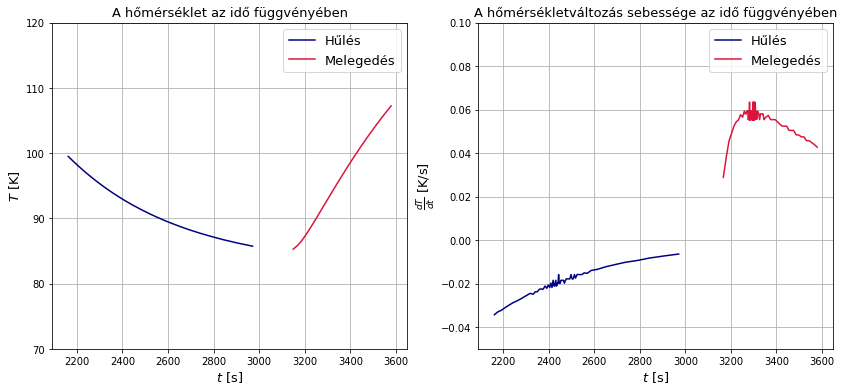

In [152]:
figsize(14,6)
fig, (ax1,ax2)=plt.subplots(1,2,sharex=True)
ax1.plot(k_hul[110:173,2],k_hul[110:173,0],color='navy',label='Hűlés')
ax1.plot(k_mel[:,2],k_mel[:,0],color='crimson',label='Melegedés')
ax1.grid(True)
ax1.set_ylabel('$T$ [K]',fontsize=13)
ax1.set_xlabel('$t$ [s]',fontsize=13)
ax1.set_ylim(70,120)
ax1.legend(fontsize=13)
ax1.set_title('A hőmérséklet az idő függvényében',fontsize=13)
ax2.plot(k_hul[110:173,2],hul_sebesseg,color='navy',label='Hűlés')
ax2.plot(k_mel[1:,2],mel_sebesseg,color='crimson',label='Melegedés')
ax2.grid(True)
ax2.set_ylabel(r'$\frac{dT}{dt}$ [K/s]',fontsize=13)
ax2.set_xlabel('$t$ [s]',fontsize=13)
ax2.set_ylim(-0.05,0.1)
ax2.legend(fontsize=13)
ax2.set_title('A hőmérsékletváltozás sebessége az idő függvényében',fontsize=13)
#savefig('./hom_valt.png',bbox_inches='tight')

In [153]:
hul_seb_int=interpolate.interp1d(k_hul[110:173,1],hul_sebesseg)
mel_seb_int=interpolate.interp1d(k_mel[1:,1],mel_sebesseg)

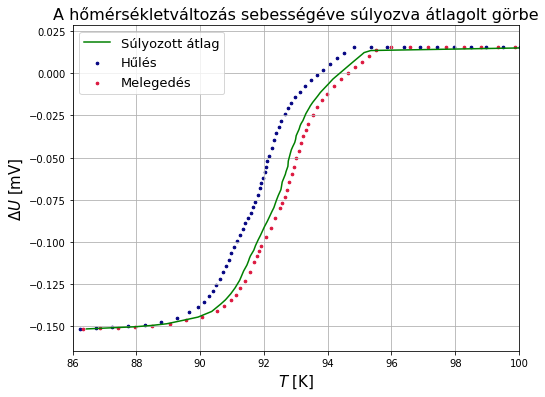

In [157]:
figsize(8,6)
mintapontok=linspace(-0.1515,0.0154,3000)

atlag=(-hul_seb_int(mintapontok)/(-hul_seb_int(mintapontok)+mel_seb_int(mintapontok))*hul_int(mintapontok) \
       +(mel_seb_int(mintapontok))/(-hul_seb_int(mintapontok)+mel_seb_int(mintapontok))*mel_int(mintapontok))

scatter(hul[:,0],k_hul[:,1],color='navy',s=7,label='Hűlés')
scatter(mel[:,0],k_mel[:,1],color='crimson',s=7,label='Melegedés')
plot(atlag,mintapontok,'g-',label='Súlyozott átlag')
xlim(86,100)
grid(True)
plt.legend(fontsize=13)
xlabel('$T$ [K]',fontsize=15)
ylabel('$\Delta U$ [mV]',fontsize=15)
title('A hőmérsékletváltozás sebességéve súlyozva átlagolt görbe',fontsize=16)
#savefig('./sulyozott.png',bbox_inches='tight')

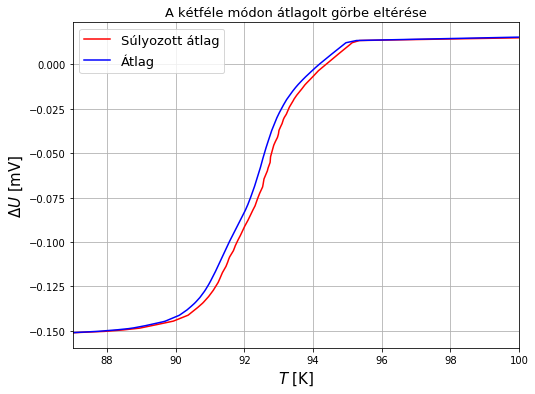

In [163]:
atlag=(-hul_seb_int(mintapontok)/(-hul_seb_int(mintapontok)+mel_seb_int(mintapontok))*hul_int(mintapontok) \
       +(mel_seb_int(mintapontok))/(-hul_seb_int(mintapontok)+mel_seb_int(mintapontok))*mel_int(mintapontok))
plot(atlag,mintapontok,'r-',label='Súlyozott átlag')
atlag=(hul_int(mintapontok)+mel_int(mintapontok))/2
plot(atlag,mintapontok,'b-',label='Átlag')
plt.legend(fontsize=13)
xlabel('$T$ [K]',fontsize=15)
ylabel('$\Delta U$ [mV]',fontsize=15)
xlim(87,100)
grid(True)
title('A kétféle módon átlagolt görbe eltérése',fontsize=13)
#savefig('./elteres',bbox_inches='tight')

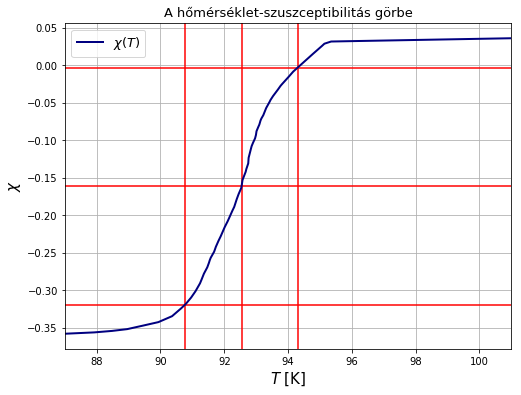

In [204]:
figsize(8,6)
atlag=(-hul_seb_int(mintapontok)/(-hul_seb_int(mintapontok)+mel_seb_int(mintapontok))*hul_int(mintapontok) \
       +(mel_seb_int(mintapontok))/(-hul_seb_int(mintapontok)+mel_seb_int(mintapontok))*mel_int(mintapontok))
szusz=zeros((atlag.shape[0]))
for i in range (atlag.shape[0]):
    szusz[i]=300/22*mintapontok[i]*1/(5.757)

xlim(87,101)

axhline((max(szusz)+min(szusz))/2,color='red')
axvline(92.543,color='red')

axhline(max(szusz+abs(min(szusz)))*0.9+min(szusz),color='red')
axvline(94.30,color='red')

axhline(max(szusz+abs(min(szusz)))*0.1+min(szusz),color='red')
axvline(90.76,color='red')

plot(atlag,szusz,color='navy',label=r'$\chi (T)$',lw=2)
ylabel(r'$\chi$',fontsize=15)
xlabel('$T$ [K]',fontsize=15)
title('A hőmérséklet-szuszceptibilitás görbe',fontsize=13)
grid(True)
legend(fontsize=13)
savefig('./szusz.png',bbox_inches='tight')

In [169]:
(max(szusz)+min(szusz))/2

-0.16118717134871383

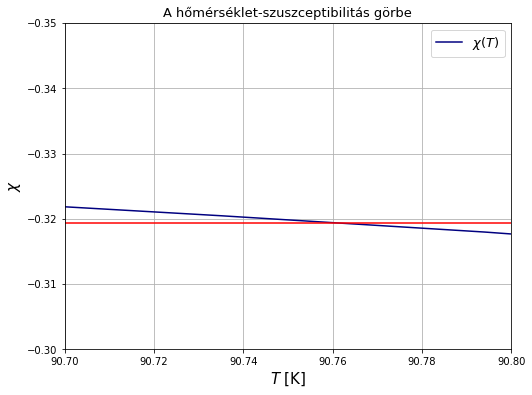

In [199]:
plot(atlag,szusz,color='navy',label=r'$\chi (T)$')
ylabel(r'$\chi$',fontsize=15)
xlabel('$T$ [K]',fontsize=15)
title('A hőmérséklet-szuszceptibilitás görbe',fontsize=13)
grid(True)
legend(fontsize=13)
xlim(90.7,90.8)
ylim(-0.30,-0.35)

axhline((max(szusz)+min(szusz))/2,color='red')
axhline(max(szusz+abs(min(szusz)))*0.9+min(szusz),color='red')
axhline(max(szusz+abs(min(szusz)))*0.1+min(szusz),color='red')

In [205]:
max(szusz+abs(min(szusz)))*0.9+min(szusz)

-0.003055568714766199

In [207]:
min(szusz)

-0.35885167464114837

In [212]:
k_hul[160:,1]

array([-0.12897, -0.13206, -0.13539, -0.1386 , -0.14175, -0.14484,
       -0.14733, -0.14892, -0.14979, -0.15057, -0.15123, -0.1518 ,
       -0.15198, -0.15195])

In [213]:
sqrt((0.5/94.30)**2+(0.5/92.76)**2)

0.007560982289754382